In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


# Simulate the data

In [2]:

# Generate data
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(0, 1, 1000)

w1_hidden = -3.5
w2_hidden = 1
b1_hidden = 5
b2_hidden = 2

w1_output = .5
w2_output = .8
b1_output = 0

y = w1_output * sigmoid(w1_hidden * x + b1_hidden) + w2_output * sigmoid(w2_hidden * x + b2_hidden) + 0.001 * np.random.normal(size=len(x))

# Train the model using keras

In [3]:
%%time

# Build the model
model = keras.Sequential([
    layers.Dense(2, activation="sigmoid", input_shape=(1,)),
    layers.Dense(1, activation="linear")
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=1000, verbose=1)

# Evaluate the model on the training data
loss = model.evaluate(x, y)
print(f'Mean Squared Error on training data: {loss}')

# Make predictions
predictions = model(x)


Epoch 1/1000
32/32 [==============================] - 2s 5ms/step - loss: 2.8955
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.6426
Epoch 3/1000
32/32 [==============================] - 0s 5ms/step - loss: 2.4050
Epoch 4/1000
32/32 [==============================] - 0s 6ms/step - loss: 2.1826
Epoch 5/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.9748
Epoch 6/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.7811
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.6009
Epoch 8/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.4338
Epoch 9/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.2793
Epoch 10/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.1369
Epoch 11/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.0060
Epoch 12/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.8865
Epoch 13/1000
32/32 [====

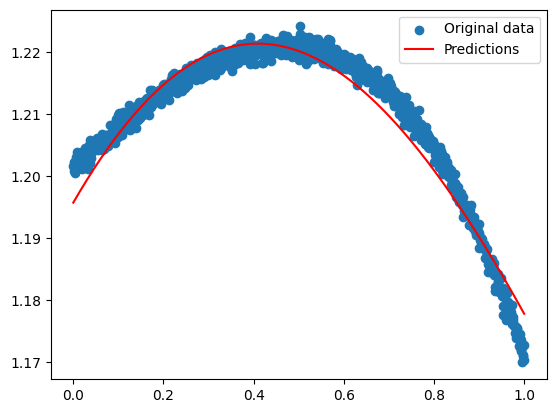

In [4]:
# Plot the original data and the predictions
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Original data')
plt.plot(x, predictions.numpy(), color='red', label='Predictions')
plt.legend()
plt.show()


In [5]:
# Access the weights of the first layer
first_layer_weights = model.layers[0].get_weights()

# The bias values are typically the second element in the weights list
bias_values = first_layer_weights[1]


print("Bias values of the first layer:", bias_values)

Bias values of the first layer: [ 0.93542206 -1.3370204 ]


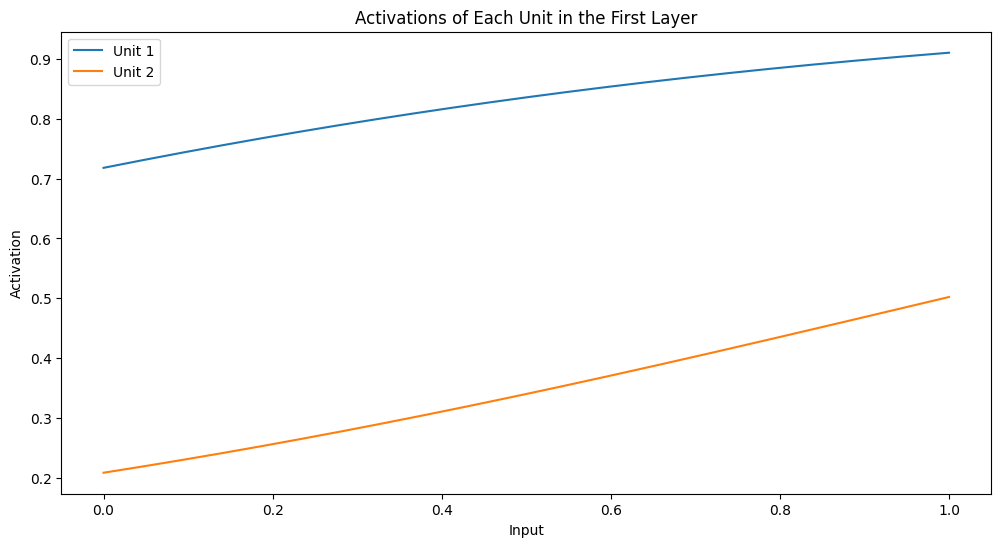

In [6]:
# Access the activations of the first layer
first_layer_activations = model.layers[0].output

# Create a function to get the activations of a specific layer
get_activations = keras.backend.function([model.layers[0].input], [first_layer_activations])

# Get activations for the input data
activations = get_activations([x.reshape(-1, 1)])[0]

# Plot the activations for each unit in the first layer
plt.figure(figsize=(12, 6))
for i in range(activations.shape[1]):
    plt.plot(x, activations[:, i], label=f'Unit {i + 1}')

plt.title('Activations of Each Unit in the First Layer')
plt.xlabel('Input')
plt.ylabel('Activation')
plt.legend()
plt.show()

# A Simple Neural Network From Scratch

Let us consider a simple linear regression:

\begin{equation}
y_i = b + w x_i + u_i, i \in \{1,...,n\}
\end{equation}

and suppose that:

$b=0.6$

$w=2$

$n=1,000$


In [7]:
beta = 2
intercept = 0.6
n_obs = 1_000

x = np.random.normal(size=n_obs)

y = intercept + beta*x + 0.1*np.random.normal(size=n_obs)

x = x.reshape((n_obs,1)).astype('float32')
y = y.astype('float32')

# Gabarito
X = np.c_[np.ones(n_obs), x]

beta_ols = np.linalg.solve(X.T.dot(X), X.T.dot(y))
beta_ols

print("OLS W = ", beta_ols[1])
print("OLS b = ", beta_ols[0])

OLS W =  2.0024577041629974
OLS b =  0.6062601412807177


In [8]:
import tensorflow as tf

class NaiveDense:

    def __init__(self, input_size, output_size, activation):
        # Initialize the dense layer with a specified input size, output size, and activation function
        self.activation = activation

        # Initialize the weight matrix W with random values
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        # Initialize the bias vector b with zeros
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        '''
        Description:
            Implements a dense layer for a given set of inputs and an
            activation function

        Args:
            inputs (tf.Tensor): Input tensor
        '''
        # Calculate the linear transformation (Wx + b) and apply the activation function
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        # Return the weights of the dense layer (W and b)
        return [self.W, self.b]


class NaiveSequential:
    def __init__(self, layers):
        # Initialize the sequential model with a list of layers
        self.layers = layers

    def __call__(self, inputs):
        '''
        Description:
            For a given set of layers and inputs, it sequentially applies
            each layer and computes the final output.

        Args:
            inputs (tf.Tensor): Input tensor
        '''
        x = inputs
        for layer in self.layers:
            # Apply each layer successively to the input x
            x = layer(x)
        return x  # Final output after passing through all layers

    @property
    def weights(self):
        # Return the weights of all layers in the sequential model
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights


In [9]:
# Define a custom function
@tf.function
def identity(x):
    return x

type(identity)

tensorflow.python.eager.polymorphic_function.polymorphic_function.Function

In [10]:
# Instantiate the model
model = NaiveSequential(
    layers=[
        NaiveDense(input_size=1, output_size=1, activation=identity)
        ]
    )

assert len(model.weights) == 2

print("Initial W = ", model.weights[0].numpy()[0,0])
print("Initial b = ", model.weights[1].numpy()[0])

Initial W =  0.049612977
Initial b =  0.0


In [11]:
# Forward pass: compute predictions and loss
with tf.GradientTape() as tape:
    predictions = model(x)
    per_sample_losses = tf.keras.losses.mean_squared_error(y, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)

# Backward pass: compute gradients and update weights
gradients = tape.gradient(average_loss, model.weights)

print("d(Loss)/d(W) = ", gradients[0].numpy()[0,0])
print("d(Loss)/d(b) = ", gradients[1].numpy()[0])


d(Loss)/d(W) =  0.13656127
d(Loss)/d(b) =  -1.0703433


In [12]:
learning_rate = 1e-3

weights = []
# Update each weight using gradient descent
for g, w in zip(gradients, model.weights):
    w.assign_sub(g * learning_rate)  # Similar to w -= g * learning_rate

print("Updated W = ", model.weights[0].numpy()[0,0])
print("Updated b = ", model.weights[1].numpy()[0])

Updated W =  0.049476415
Updated b =  0.0010703433


In [13]:
def update_weights(gradients, weights):
    """
    Update the model weights using gradient descent.

    Args:
    - gradients (list of tf.Tensor): Gradients of the model parameters.
    - weights (list of tf.Variable): Model weights to be updated.

    Returns:
    - None
    """
    learning_rate = 1e-3

    # Update each weight using gradient descent
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)  # Similar to w -= g * learning_rate

In [14]:

def one_training_step(model, x_train, y_train):
    """
    Perform one training step: forward and backward pass.

    Args:
    - model (tf.keras.Model): The neural network model.
    - images_batch (tf.Tensor): Batch of input images.
    - labels_batch (tf.Tensor): Batch of corresponding labels.

    Returns:
    - average_loss (tf.Tensor): Average loss over the batch.
    """
    # Forward pass: compute predictions and loss
    with tf.GradientTape() as tape:
        predictions = model(x_train)
        per_sample_losses = tf.keras.losses.mean_squared_error(y_train, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)

    # Backward pass: compute gradients and update weights
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)

    return average_loss


In [15]:

def fit(model, x_train, y_train, epochs):
    """
    Train the model using the given dataset for a specified number of epochs.

    Args:
    - model (tf.keras.Model): The neural network model to be trained.
    - images (list or array-like): Input images for training.
    - labels (list or array-like): Corresponding labels for the input images.
    - epochs (int): Number of times to iterate over the entire dataset.

    Returns:
    - None
    """
    for epoch_counter in range(epochs):

        # Perform one training step (forward and backward pass)
        loss = one_training_step(model, x_train, y_train)

        if epoch_counter % 500==0:
            print(f"Epoch {epoch_counter}")
            print(f"Loss: {loss}")



In [16]:
%%time

# Instantiate the model
model = NaiveSequential(
    layers=[
        NaiveDense(input_size=1, output_size=1, activation=identity)
        ]
    )

assert len(model.weights) == 2

fit(model, x, y, 20000)

Epoch 0
Loss: 4.246014595031738
Epoch 500
Loss: 3.992224931716919
Epoch 1000
Loss: 3.9586169719696045
Epoch 1500
Loss: 3.954146385192871
Epoch 2000
Loss: 3.9535489082336426
Epoch 2500
Loss: 3.9534683227539062
Epoch 3000
Loss: 3.9534575939178467
Epoch 3500
Loss: 3.9534566402435303
Epoch 4000
Loss: 3.953456401824951
Epoch 4500
Loss: 3.953456401824951
Epoch 5000
Loss: 3.953456401824951
Epoch 5500
Loss: 3.953456401824951
Epoch 6000
Loss: 3.9534566402435303
Epoch 6500
Loss: 3.953456401824951
Epoch 7000
Loss: 3.953456401824951
Epoch 7500
Loss: 3.953456401824951
Epoch 8000
Loss: 3.953456401824951
Epoch 8500
Loss: 3.953456401824951
Epoch 9000
Loss: 3.953456401824951
Epoch 9500
Loss: 3.953456401824951
Epoch 10000
Loss: 3.953456401824951
Epoch 10500
Loss: 3.953456401824951
Epoch 11000
Loss: 3.953456401824951
Epoch 11500
Loss: 3.953456401824951
Epoch 12000
Loss: 3.953456401824951
Epoch 12500
Loss: 3.953456401824951
Epoch 13000
Loss: 3.953456401824951
Epoch 13500
Loss: 3.953456401824951
Epoch 1400

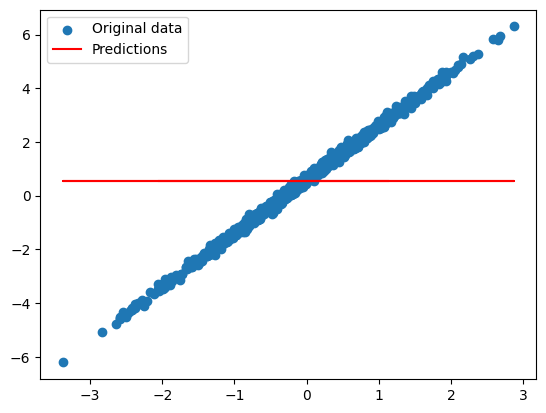

In [17]:
# Plot the original data and the predictions
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Original data')
plt.plot(x, model(x), color='red', label='Predictions')
plt.legend()
plt.show()


In [18]:
print("After training W = ", model.weights[0].numpy()[0,0])
print("After training b = ", model.weights[1].numpy()[0])

print("OLS W = ", beta_ols[1])
print("OLS b = ", beta_ols[0])

After training W =  -5.4927796e-07
After training b =  0.5333507
OLS W =  2.0024577041629974
OLS b =  0.6062601412807177


# Stochastic Gradient Descent

In [19]:
import math

class BatchGenerator:

    def __init__(self, x_train, y_train, batch_size):
        # Ensure that the length of images is equal to the length of labels
        assert len(x_train) == len(y_train)

        # Initialize the index to keep track of the current position in the data
        self.index = 0

        # Store the provided images, labels, and batch size
        self.x_train = x_train
        self.y_train = y_train
        self.batch_size = batch_size

        # Calculate the total number of batches needed to cover all data
        self.num_batches = math.ceil(len(x_train) / batch_size)

    def next(self):
        # Retrieve the next batch of images and labels based on the current index
        x_train = self.x_train[self.index : self.index + self.batch_size]
        y_train = self.y_train[self.index : self.index + self.batch_size]

        # Increment the index by the batch size for the next iteration
        self.index += self.batch_size

        # If the end of the data is reached, reset the index for the next epoch
        if self.index >= len(self.x_train):
            self.index = 0

        # Return the current batch of images and labels
        return x_train, y_train

In [20]:
def fit(model, x_train, y_train, epochs, batch_size):
    """
    Train the model using the given dataset for a specified number of epochs.

    Args:
    - model (tf.keras.Model): The neural network model to be trained.
    - images (list or array-like): Input images for training.
    - labels (list or array-like): Corresponding labels for the input images.
    - epochs (int): Number of times to iterate over the entire dataset.

    Returns:
    - None
    """


    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")

        # Create a BatchGenerator for the current epoch
        batch_generator = BatchGenerator(x_train, y_train, batch_size)

        # Iterate over batches in the current epoch
        for batch_counter in range(batch_generator.num_batches):
            # Get the next batch of images and labels
            x_batch, y_batch = batch_generator.next()

            # Perform one training step (forward and backward pass)
            loss = one_training_step(model, x_batch, y_batch)

            # Print loss at regular intervals
            if batch_counter % 100 == 0:
                print(f"Loss at batch {batch_counter}: {loss:.4f}")



In [21]:
%%time

# Instantiate the model
model = NaiveSequential(
    layers=[
        NaiveDense(input_size=1, output_size=1, activation=identity),
        ]
    )

fit(model, x, y, 20, 1)

Epoch 0
Loss at batch 0: 11.6629
Loss at batch 100: 0.1786
Loss at batch 200: 1.4093
Loss at batch 300: 0.0511
Loss at batch 400: 0.8082
Loss at batch 500: 0.9452
Loss at batch 600: 1.2441
Loss at batch 700: 0.2306
Loss at batch 800: 0.0101
Loss at batch 900: 0.1100
Epoch 1
Loss at batch 0: 0.2514
Loss at batch 100: 0.0254
Loss at batch 200: 0.0552
Loss at batch 300: 0.0009
Loss at batch 400: 0.0310
Loss at batch 500: 0.0459
Loss at batch 600: 0.0855
Loss at batch 700: 0.0001
Loss at batch 800: 0.0002
Loss at batch 900: 0.0015
Epoch 2
Loss at batch 0: 0.0099
Loss at batch 100: 0.0125
Loss at batch 200: 0.0083
Loss at batch 300: 0.0001
Loss at batch 400: 0.0046
Loss at batch 500: 0.0104
Loss at batch 600: 0.0293
Loss at batch 700: 0.0071
Loss at batch 800: 0.0011
Loss at batch 900: 0.0088
Epoch 3
Loss at batch 0: 0.0019
Loss at batch 100: 0.0108
Loss at batch 200: 0.0049
Loss at batch 300: 0.0000
Loss at batch 400: 0.0026
Loss at batch 500: 0.0072
Loss at batch 600: 0.0235
Loss at batch

In [23]:
print("After training W = ", model.weights[0].numpy()[0,0])
print("After training b = ", model.weights[1].numpy()[0])

print("*"*50)

print("OLS W = ", beta_ols[1])
print("OLS b = ", beta_ols[0])

After training W =  2.0038235
After training b =  0.6091213
**************************************************
OLS W =  2.0024577041629974
OLS b =  0.6062601412807177


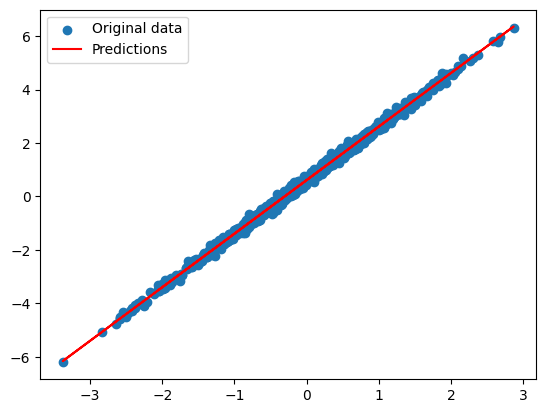

In [24]:
# Plot the original data and the predictions
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Original data')
plt.plot(x, model(x), color='red', label='Predictions')
plt.legend()
plt.show()

# Tensorflow/Keras implementation

In [25]:
# Build the model
model = keras.Sequential([
    layers.Dense(1, activation="linear")
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=500, verbose=1)

# Evaluate the model on the training data
loss = model.evaluate(x, y)
print(f'Mean Squared Error on training data: {loss}')

# Make predictions
predictions = model(x)

Epoch 1/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7865
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.7142
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6461
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5834
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.5251
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 0.4722
Epoch 7/500
32/32 [==============================] - 0s 5ms/step - loss: 0.4235
Epoch 8/500
32/32 [==============================] - 0s 4ms/step - loss: 0.3795
Epoch 9/500
32/32 [==============================] - 0s 6ms/step - loss: 0.3390
Epoch 10/500
32/32 [==============================] - 0s 5ms/step - loss: 0.3018
Epoch 11/500
32/32 [==============================] - 0s 5ms/step - loss: 0.2674
Epoch 12/500
32/32 [==============================] - 0s 5ms/step - loss: 0.2367
Epoch 13/500
32/32 [=================

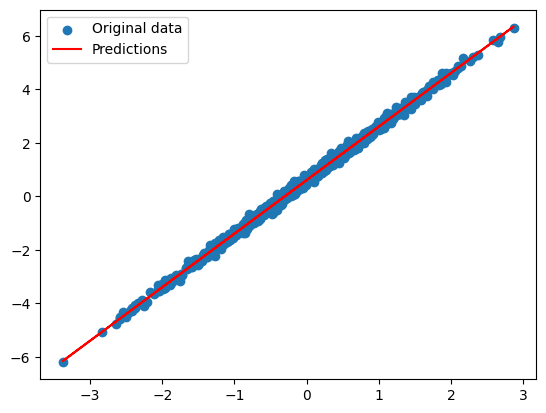

In [26]:
import matplotlib.pyplot as plt

plt.scatter(x, y, label='Original data')
plt.plot(x, model(x), color='red', label='Predictions')
plt.legend()
plt.show()